# Analisis Factorial

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datos = np.genfromtxt("datos_compras.csv", delimiter=','); datos

array([[1.  , 0.02, 0.96, 0.42, 0.01],
       [0.02, 1.  , 0.13, 0.71, 0.85],
       [0.96, 0.13, 1.  , 0.5 , 0.11],
       [0.42, 0.71, 0.5 , 1.  , 0.79],
       [0.01, 0.85, 0.11, 0.79, 1.  ]])

## Haciendolo a "Manopla"

Primero de la matriz de correlacion, tenemos que calcular los eigen valores y eigen vectores

In [10]:
evalue ,evector = np.linalg.eig(datos)

In [11]:
evalue

array([2.85309042, 1.80633245, 0.03367744, 0.20449022, 0.10240947])

In [13]:
evector

array([[-0.33145388, -0.60721643,  0.70178301,  0.09848524,  0.13866434],
       [-0.46015931,  0.39003172,  0.07167464,  0.74256408, -0.28211699],
       [-0.38205721, -0.55650828, -0.70871671,  0.16840896,  0.11700371],
       [-0.55597687,  0.07806457,  0.00165635, -0.60158211, -0.56823575],
       [-0.47256084,  0.40418799,  0.00901257, -0.22053713,  0.75139901]])

Los graficamos para tener un poco mas de entendimineto de como estan distribuidos

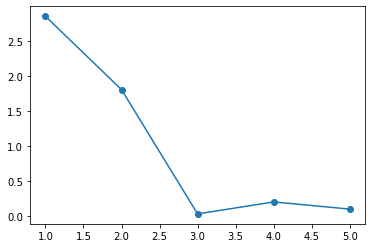

In [15]:
plt.scatter(range(1,evalue.shape[0]+1),evalue)
plt.plot(range(1,evalue.shape[0]+1),evalue)

Vemos que eigenvalor proporciona mas varianza

In [17]:
porcentajes = [lambdai/sum(evalue) for lambdai in evalue]
porcentajes

[0.5706180840783914,
 0.3612664907232692,
 0.006735487150961454,
 0.04089804471621918,
 0.020481893331158667]

Los primeros dos tienen en mayor porcentaje de varianza por lo que esos son los que vamos a tomar. Eso quiere decir que el numero de factores que vamos a tomar son 2

In [19]:
vector = evector[:, 0:2]
vector

array([[-0.33145388, -0.60721643],
       [-0.46015931,  0.39003172],
       [-0.38205721, -0.55650828],
       [-0.55597687,  0.07806457],
       [-0.47256084,  0.40418799]])

In [20]:
value = np.sqrt(evalue[:2]); value

array([1.68910936, 1.34399868])

In [83]:
l = value * vector
l

array([[-0.55986184, -0.81609808],
       [-0.77725939,  0.52420211],
       [-0.64533641, -0.74794639],
       [-0.93910573,  0.10491868],
       [-0.79820694,  0.54322813]])

Ahora si podemos escribir el modelo

In [84]:
for i,j in enumerate(l):
    print(f"x{i+1} = {j[0]:.2f}f{i+1} {j[1]:.2f}f{i+1}")

x1 = -0.56f1 -0.82f1
x2 = -0.78f2 0.52f2
x3 = -0.65f3 -0.75f3
x4 = -0.94f4 0.10f4
x5 = -0.80f5 0.54f5


Realizamos las multiplicaciones de matrices

In [24]:
L = l@l.T
L

array([[0.97946135, 0.00735754, 0.97169684, 0.44014553, 0.00355818],
       [0.00735754, 0.87892002, 0.10951871, 0.78492734, 0.90517518],
       [0.97169684, 0.10951871, 0.97588288, 0.52756557, 0.10880649],
       [0.44014553, 0.78492734, 0.52756557, 0.8929275 , 0.80659549],
       [0.00355818, 0.90517518, 0.10880649, 0.80659549, 0.93223112]])

In [25]:
comunalidades = [L[i][i] for i in range(L.shape[0])]
comunalidades

[0.9794613535783372,
 0.8789200218777702,
 0.9758828809595488,
 0.8929275001299728,
 0.9322311174626734]

In [26]:
psi = np.zeros_like(L); psi

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [27]:
for i in range(psi.shape[0]):
    psi[i][i] = 1 - comunalidades[i]

In [28]:
psi

array([[0.02053865, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.12107998, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.02411712, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.1070725 , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.06776888]])

In [29]:
L + psi

array([[1.        , 0.00735754, 0.97169684, 0.44014553, 0.00355818],
       [0.00735754, 1.        , 0.10951871, 0.78492734, 0.90517518],
       [0.97169684, 0.10951871, 1.        , 0.52756557, 0.10880649],
       [0.44014553, 0.78492734, 0.52756557, 1.        , 0.80659549],
       [0.00355818, 0.90517518, 0.10880649, 0.80659549, 1.        ]])

In [31]:
datos - (L + psi)

array([[ 0.        ,  0.01264246, -0.01169684, -0.02014553,  0.00644182],
       [ 0.01264246,  0.        ,  0.02048129, -0.07492734, -0.05517518],
       [-0.01169684,  0.02048129,  0.        , -0.02756557,  0.00119351],
       [-0.02014553, -0.07492734, -0.02756557,  0.        , -0.01659549],
       [ 0.00644182, -0.05517518,  0.00119351, -0.01659549,  0.        ]])

## Esto ya esta en python?
## *Si*, porque casi todo ya esta hecho en python
### y si no esta, es porque lo estan haciendo

para instalar el paquete:
`conda install -c desilinguist factor_analyzer` o
`pip install factor_analyzer`

In [64]:
# from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.datasets import load_digits

Con `FactorAnalyzer` ya podemos espeficar las rotaciones y que metodo usar para el Analisis Factorial, algo que no se hizo en la implementacion a "Manopla". La doumentacion de este paquete la puedes consultar [aqui](https://buildmedia.readthedocs.org/media/pdf/factor-analyzer/latest/factor-analyzer.pdf)

In [65]:
fa1 = FactorAnalyzer(rotation="varimax", is_corr_matrix=True, method='ml')

In [66]:
fa1.fit(datos)

FactorAnalyzer(is_corr_matrix=True, method='ml', rotation='varimax',
               rotation_kwargs={})

In [67]:
fa1.corr_

array([[1.  , 0.02, 0.96, 0.42, 0.01],
       [0.02, 1.  , 0.13, 0.71, 0.85],
       [0.96, 0.13, 1.  , 0.5 , 0.11],
       [0.42, 0.71, 0.5 , 1.  , 0.79],
       [0.01, 0.85, 0.11, 0.79, 1.  ]])

In [68]:
evalues, v = fa1.get_eigenvalues() # evalues, #common factor eigen valores

In [69]:
evalues

array([2.85309042, 1.80633245, 0.20449022, 0.10240947, 0.03367744])

In [70]:
promedios = [evalue/sum(evalues) for evalue in evalues]
promedios

[0.570618084078392,
 0.36126649072326894,
 0.04089804471621918,
 0.02048189333115865,
 0.0067354871509615315]

In [72]:
fa1 = FactorAnalyzer(n_factors=2, rotation="varimax",is_corr_matrix=True, method='ml')

In [73]:
fa1.fit(datos)

FactorAnalyzer(is_corr_matrix=True, method='ml', n_factors=2,
               rotation='varimax', rotation_kwargs={})

In [74]:
fa1.corr_

array([[1.  , 0.02, 0.96, 0.42, 0.01],
       [0.02, 1.  , 0.13, 0.71, 0.85],
       [0.96, 0.13, 1.  , 0.5 , 0.11],
       [0.42, 0.71, 0.5 , 1.  , 0.79],
       [0.01, 0.85, 0.11, 0.79, 1.  ]])

In [75]:
fa1.loadings_

array([[ 0.02525974,  0.98548544],
       [ 0.87335034,  0.00494649],
       [ 0.1311586 ,  0.97077874],
       [ 0.81709321,  0.40499735],
       [ 0.97342449, -0.01612868]])

In [76]:
fa1.get_communalities()

array([0.97181961, 0.76276528, 0.95961394, 0.83166417, 0.94781538])

In [77]:
fa1.get_factor_variance()

(array([2.39577801, 2.07790037]),
 array([0.4791556 , 0.41558007]),
 array([0.4791556 , 0.89473568]))

In [78]:
psi = np.zeros_like(datos)
for i in range(psi.shape[0]):
    psi[i][i] = 1 - fa1.get_communalities()[i]

In [79]:
psi

array([[0.02818039, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.23723472, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.04038606, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.16833583, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.05218462]])

In [87]:
datos - (fa1.loadings_ @ fa1.loadings_.T + psi)

array([[ 0.00000000e+00, -6.93529661e-03, -1.34619167e-06,
         2.41443949e-04,  1.30613322e-03],
       [-6.93529661e-03,  0.00000000e+00,  1.06506412e-02,
        -5.61195037e-03, -6.08296620e-05],
       [-1.34619167e-06,  1.06506412e-02,  0.00000000e+00,
        -3.31624029e-04, -2.01561435e-03],
       [ 2.41443949e-04, -5.61195037e-03, -3.31624029e-04,
         0.00000000e+00,  1.15352814e-03],
       [ 1.30613322e-03, -6.08296620e-05, -2.01561435e-03,
         1.15352814e-03,  0.00000000e+00]])

Vemos que la matriz nos quedo con 0 y con numeros super pequeños por lo que podemos inferir que es un buen modelo

## Sobre la implementacion de [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html)
`FactorAnalysis` de sklearn tiene lo mismo que esta de `FactorAnalyzer` con la diferencia de que aun no se puede espeficicar la rotacion